In [1]:
import sys
import numpy as np
import datetime
from copy import deepcopy
from gene import Gene, GeneChain
from evolution import Evolution
from loader import load_results, load_trading_params, load_nontrading_params, load_indivs
from crosser import Cross10to100, RandomGeneCrosser
from mutator import GausianMutator, MutRandomIndivs, RandomGeneChainMutator
from selector import TopNSelector
from util import plot
from fitness import Fitness

## Load data

In [2]:
db_indivs = load_indivs()   # pandas object, for fitness function; db individuals have only non-trading parameters
trading_params = load_trading_params()  # pandas object, for precomputation
nontrading_params = load_nontrading_params()    # pandas object, for precomputation

## Init base gene chain

In [3]:
base_gene_chain = GeneChain()
for index, row in nontrading_params.iterrows():
    dtype = np.dtype(row["TYPE"]).type
    is_interval = True if dtype != bool else False
    min_range = dtype(row["MIN_RANGE"])
    max_value = dtype(max(db_indivs[index]))
    min_value = dtype(min(db_indivs[index]))

    base_gene_chain.add(Gene(dtype=dtype, is_interval=is_interval, min_radius=min_range/2,
                             min_value=min_value, max_value=max_value, ordering=-1))

for index, row in trading_params.iterrows():
    is_interval = False
    dtype = np.dtype(row["TYPE"]).type
    min_value = dtype(row["MIN"])
    max_value = dtype(row["MAX"])
    base_gene_chain.add(Gene(dtype=dtype, is_interval=is_interval, tags=["trading"],
                             min_value=min_value, max_value=max_value, ordering=-1))

## Init genetic algorithm

In [4]:
ev = Evolution(
    MAX_GENS=10,
    fitness=Fitness(spread=0.0001),
    base_indiv=base_gene_chain,
    crosser=RandomGeneCrosser(),
    selector=TopNSelector(),
    verbose=True)

In [5]:
#ev.init_random_indivs(size=1, min_models=100)
#ev.dump("population.pkl")
ev.load_indivs("population.pkl")

## Run 

In [6]:
ev.run(dump="best.pkl")

Generation: 10 | Best fitness: 15.0 | Models: 11 | Time: avg per gen = 10s. total = 96s.                                                                                                    

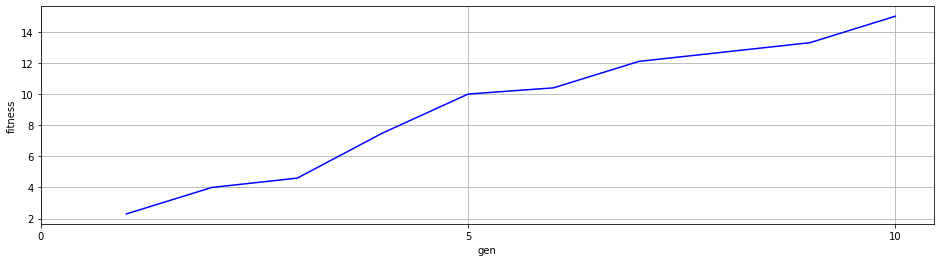

In [7]:
plot([ res["fitness"].score for res in ev._run_results ], "fitness")

In [8]:
ev.print_generation()

fitness: 15.0 models: 11 max account value: 15.8 max drawdown: 0.8
fitness: 13.3 models: 9 max account value: 13.9 max drawdown: 0.6
fitness: 13.3 models: 9 max account value: 13.9 max drawdown: 0.6
fitness: 13.3 models: 9 max account value: 13.9 max drawdown: 0.6
fitness: 13.3 models: 9 max account value: 13.9 max drawdown: 0.6
fitness: 13.3 models: 9 max account value: 13.9 max drawdown: 0.6
fitness: 13.3 models: 9 max account value: 13.9 max drawdown: 0.6
fitness: 13.3 models: 9 max account value: 13.3 max drawdown: 0.6
fitness: 13.3 models: 9 max account value: 13.3 max drawdown: 0.6
fitness: 13.3 models: 9 max account value: 13.3 max drawdown: 0.6
